## Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

## Load and inspect dataset

In [2]:
df = pd.read_csv(f"{os.getcwd()}\\Student-Pass-Fail-Data.csv")
print(df)
print(df.info())

     Self_Study_Daily  Tution_Monthly  Pass_Or_Fail
0                   7              27             1
1                   2              43             0
2                   7              26             1
3                   8              29             1
4                   3              42             0
..                ...             ...           ...
995                 6              22             1
996                 9              30             1
997                 3              39             0
998                 7              25             1
999                 5              37             0

[1000 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Self_Study_Daily  1000 non-null   int64
 1   Tution_Monthly    1000 non-null   int64
 2   Pass_Or_Fail      1000 non-null   int64
dtypes: int64(3)
memo

## Clean data

In [3]:
df.isnull().sum()

Self_Study_Daily    0
Tution_Monthly      0
Pass_Or_Fail        0
dtype: int64

## Extract Features and Target

In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
X

,Self_Study_Daily,Tution_Monthly
0,7,27
1,2,43
2,7,26
3,8,29
4,3,42
...,...,...
995,6,22
996,9,30
997,3,39
998,7,25


In [6]:
np.unique(y)

array([0, 1])

## Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Standardize data

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## CV Score on Training data

In [9]:
k = 5
cv = KFold(n_splits=k, random_state = 42 , shuffle=True)

# Build multiple logistic regression models
model_cv = LogisticRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model_cv, X_train, y_train, scoring='accuracy', cv=cv )

print("Avg accuracy : %0.2f" % (np.mean(scores)))

Avg accuracy : 0.97


## Predictions from test data

In [10]:
y_pred_cv = cross_val_predict(model_cv, X_test, y_test, cv = cv)

## Probabilities from X_test

In [11]:
y_pred_cv_prob = cross_val_predict(model_cv, X_test, y_test, cv=cv, method='predict_proba')
y_pred_cv_prob

array([[7.68558933e-01, 2.31441067e-01],
       [9.98782431e-01, 1.21756899e-03],
       [5.13607590e-02, 9.48639241e-01],
       [9.99981180e-01, 1.88204792e-05],
       [1.21254806e-01, 8.78745194e-01],
       [1.11657661e-01, 8.88342339e-01],
       [9.99998567e-01, 1.43321862e-06],
       [9.99950808e-01, 4.91917040e-05],
       [5.74395520e-02, 9.42560448e-01],
       [1.17748769e-01, 8.82251231e-01],
       [1.21254806e-01, 8.78745194e-01],
       [7.68558933e-01, 2.31441067e-01],
       [9.94509507e-01, 5.49049327e-03],
       [3.22779452e-02, 9.67722055e-01],
       [9.45053774e-02, 9.05494623e-01],
       [9.99951533e-01, 4.84665594e-05],
       [4.84968903e-02, 9.51503110e-01],
       [8.01912799e-02, 9.19808720e-01],
       [9.81540934e-01, 1.84590664e-02],
       [8.79373805e-01, 1.20626195e-01],
       [9.99927879e-01, 7.21208186e-05],
       [5.50321789e-02, 9.44967821e-01],
       [3.92922484e-02, 9.60707752e-01],
       [5.79419159e-01, 4.20580841e-01],
       [7.143912

## Observing class probabilities and class predictions

In [12]:
prob_df = pd.DataFrame({"Prob_class_0" : np.round(y_pred_cv_prob[:,0], decimals = 2)
,"Prob_class_1": np.round(y_pred_cv_prob[:,1], decimals = 2)
,"Predicted class": y_pred_cv})
prob_df

,Prob_class_0,Prob_class_1,Predicted class
0,0.77,0.23,0
1,1.00,0.00,0
2,0.05,0.95,1
3,1.00,0.00,0
4,0.12,0.88,1
...,...,...,...
195,0.99,0.01,0
196,0.06,0.94,1
197,0.98,0.02,0
198,1.00,0.00,0


## Accuracy

In [13]:
Accuracy = np.mean(y_pred_cv == y_test) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 98.00


## Confusion Matrics

In [14]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

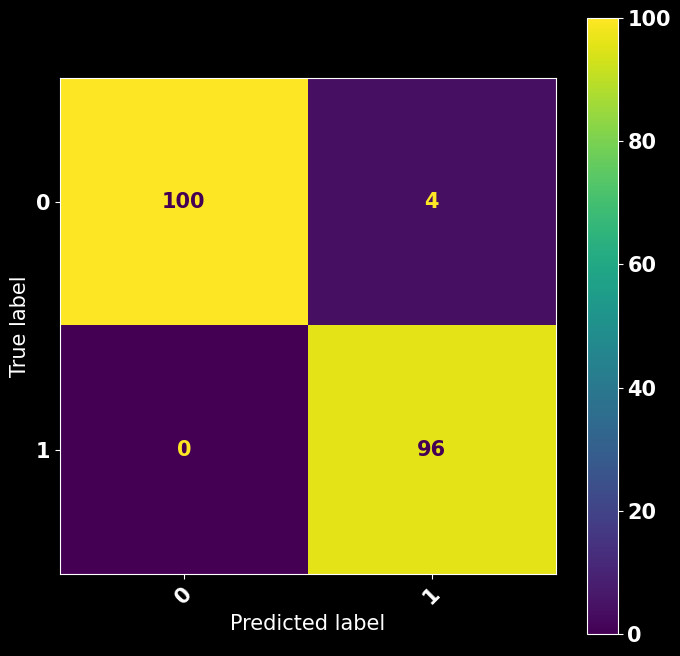

In [15]:
cm = confusion_matrix(y_test, y_pred_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

## Accuracy, Precision, Recall and F1-Score

In [16]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred_cv, normalize=True)]
,"Precision":[precision_score(y_test, y_pred_cv, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred_cv, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred_cv, average = 'macro')]})

In [17]:
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.98,0.98,0.980769,0.979992


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       104
           1       0.96      1.00      0.98        96

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

